In [73]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

In [74]:
df=pd.read_csv('Experience-Salary.csv')

In [75]:
df

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


<Axes: >

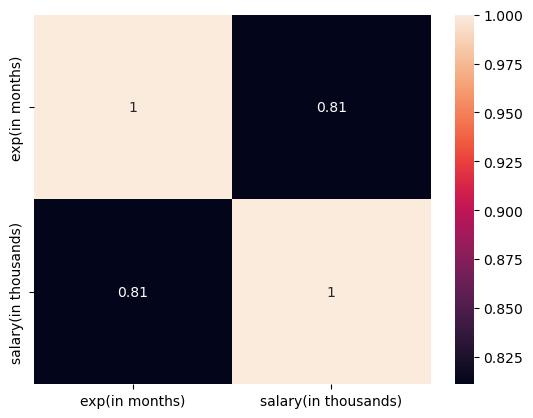

In [76]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [78]:
df

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [79]:
df.dropna()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [80]:
df.columns=[col[:3] for col in df.columns]

In [81]:
df.columns

Index(['exp', 'sal'], dtype='object')

Splitiing Data

In [82]:
#train data
train_input=np.array(df.exp[0:700])
train_output=np.array(df.sal[0:700])

In [83]:
train_input=train_input.reshape(700,1)
train_output=train_output.reshape(700,1)

In [86]:
#test data
test_input=np.array(df.exp[700:1001]).reshape(300,1)
test_output=np.array(df.sal[700:1001]).reshape(300,1)

Linear Regression

In [89]:
def line_fun (train_input,parameters):
    m=parameters["m"]
    c=parameters["c"]
    prediction =np.multiply(m,train_input)+ c
    return prediction

In [90]:
def cost_fun (prediction,train_output):

    cost=(np.mean(train_output-prediction)**2)*0.5

    return cost


In [95]:
#d(f)=sumattion(prediction-train_output)/n
#d(m)=d(f)*x
#d(c)=d(f)*1

def Gradient_decent (train_input,train_output,prediction):
    derivative=dict()
    d_f=prediction-train_output
    dm=np.mean(np.multiply(d_f,train_input))
    dc=np.mean(df)

    derivative["dm"]=dm
    derivative["dc"]=dc

    return derivative



In [92]:
#update the parameter
# m= m-(learning_rate*dm)
# c= c-(learning_rate*dc)

def update_parameters (parameters,derivative,learning_rate):

    parameters["m"]= parameters["m"]-(learning_rate*derivative["dm"])
    parameters["c"]= parameters["c"]-(learning_rate*derivative["dc"])

    return parameters
   



In [96]:
#train function
def Train(train_input,train_output,learning_rate,iters):
    #initiate random Parameters
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)

    plt.figure()
    #loss
    loss=[]

    #iterations
    for i in range (iters):
        #take predictions
        prediction=line_fun(train_input,parameters)
        
        #calculate the cost
        cost=cost_fun(prediction,train_output)
        loss.append(cost)
        print(f"Itretion={i+1}, Loss={cost}")

        #plot
        fig,ax=plt.subplots()
        ax.plot(train_input,train_output,"+")
        ax.plot(train_input,prediction,"*")

        legends=ax.legend()
        plt.plot(train_input,train_output,"+")
        plt.plot(train_input,train_output,"*")
        plt.show()
        

        
        #now perform gradient decent on the cost fn
        Gradient= Gradient_decent(train_input,train_output,prediction)
        
        #Update the old parameters
        parameters=update_parameters (parameters,Gradient,learning_rate)

    return parameters,loss
        
        


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=1, Loss=11.122435624735271


<Figure size 640x480 with 0 Axes>

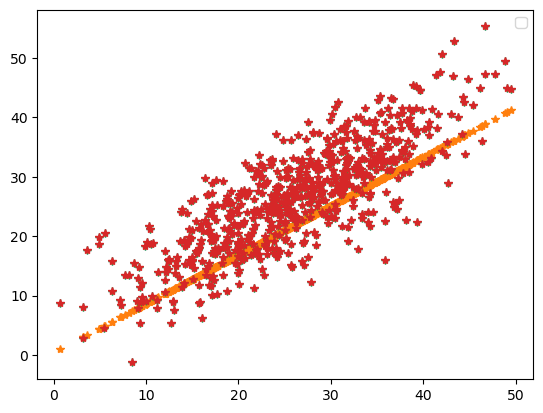

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=2, Loss=9.682679492642286


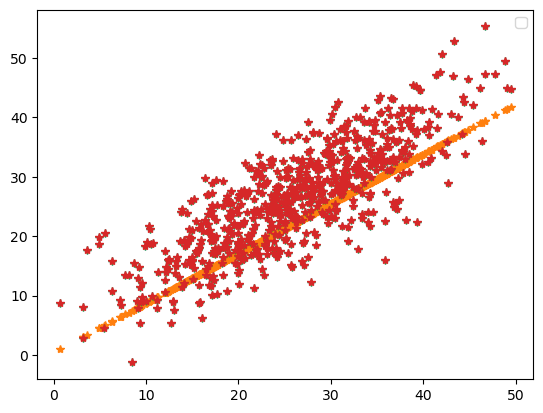

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=3, Loss=8.440980754278655


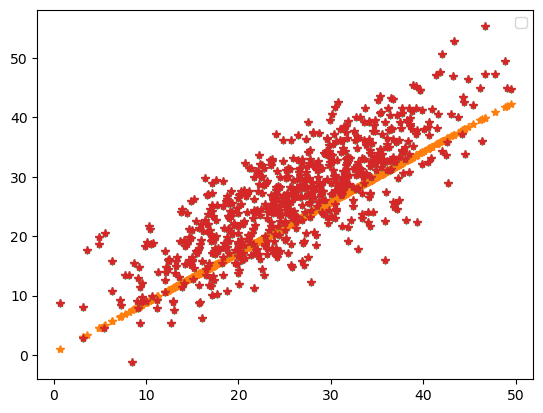

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=4, Loss=7.369336243998786


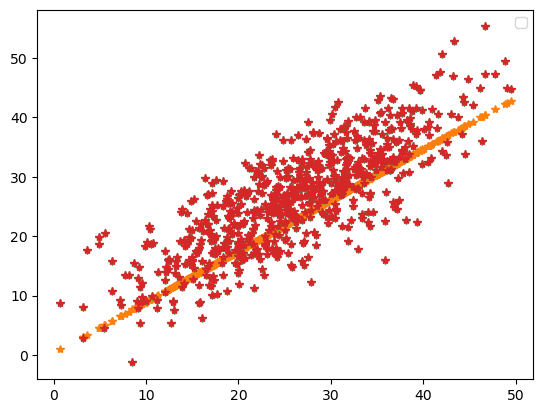

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=5, Loss=6.443763088077797


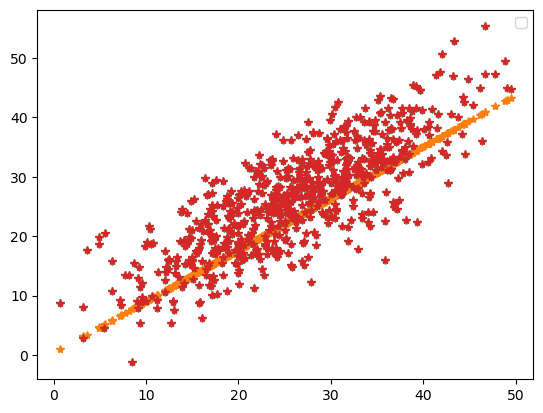

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=6, Loss=5.643716778102159


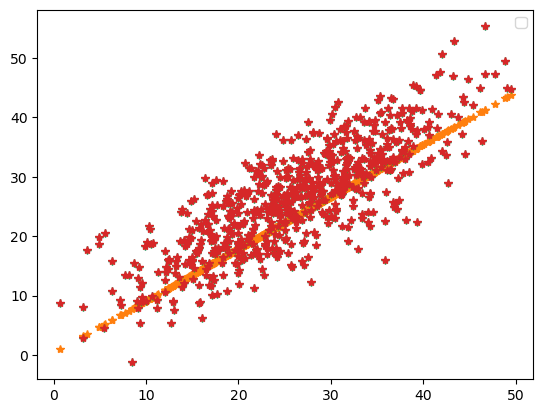

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=7, Loss=4.951593841407935


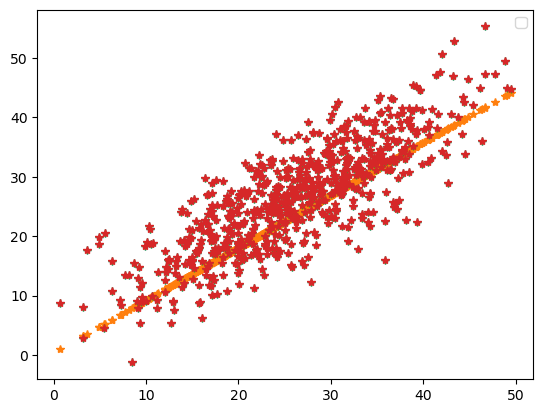

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=8, Loss=4.352306782580192


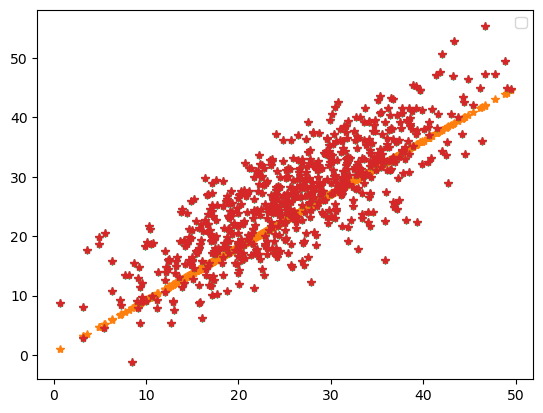

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=9, Loss=3.8329207680568054


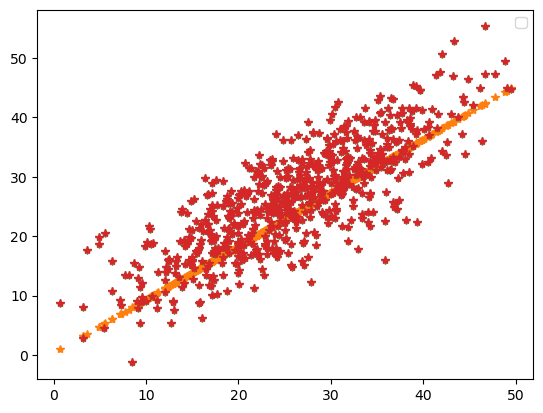

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=10, Loss=3.3823430614666337


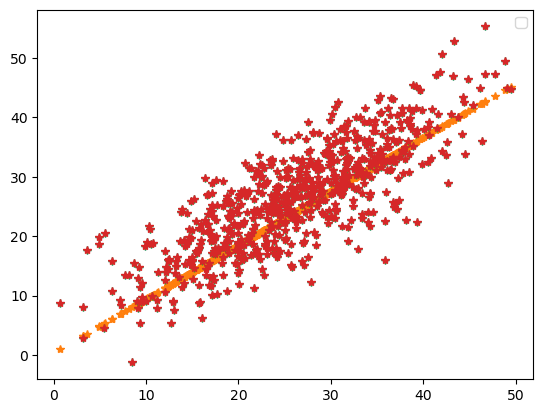

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=11, Loss=2.9910575287936725


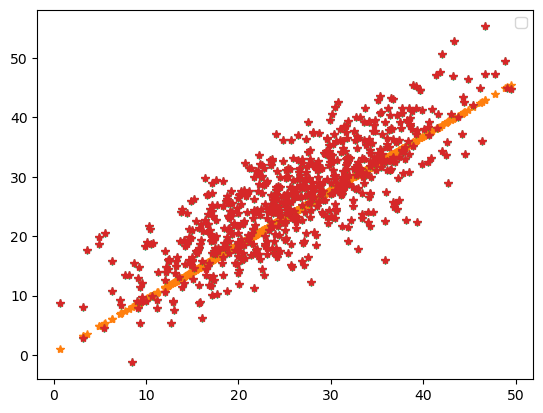

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=12, Loss=2.6508976525189447


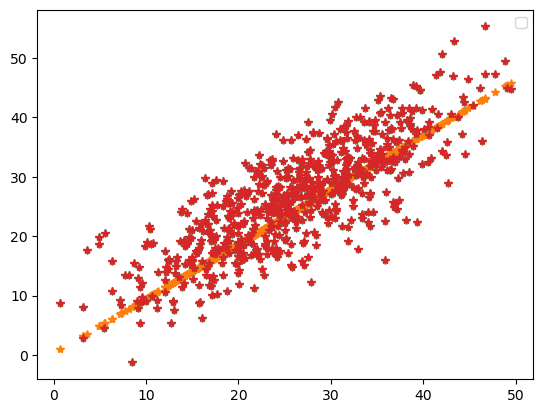

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=13, Loss=2.354852450494574


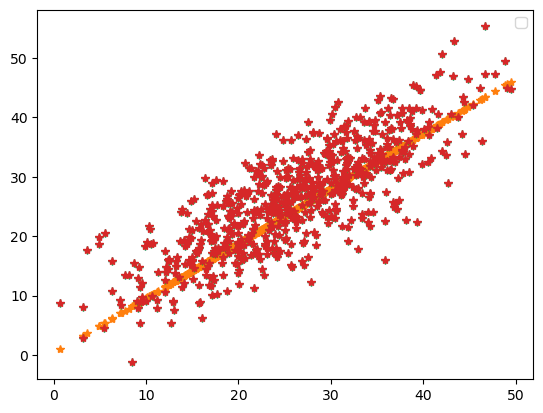

Itretion=14, Loss=2.096900512313908


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


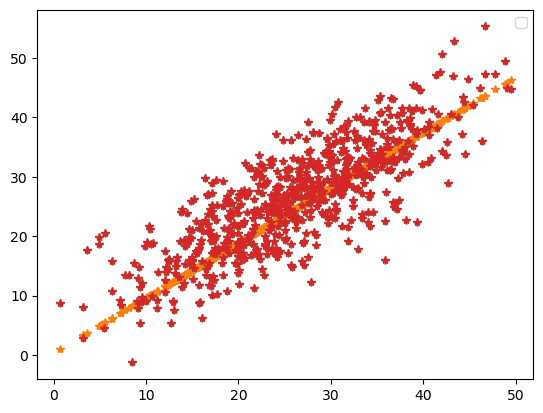

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=15, Loss=1.8718680637366114


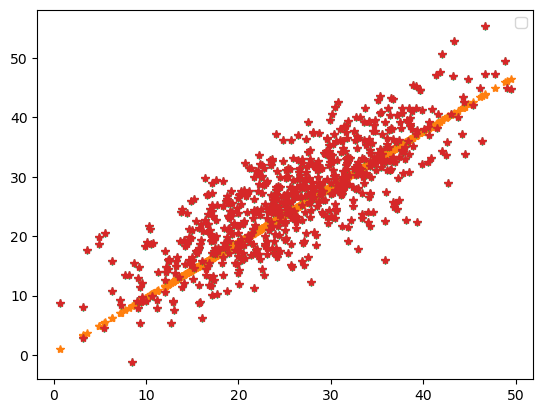

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=16, Loss=1.6753075657115657


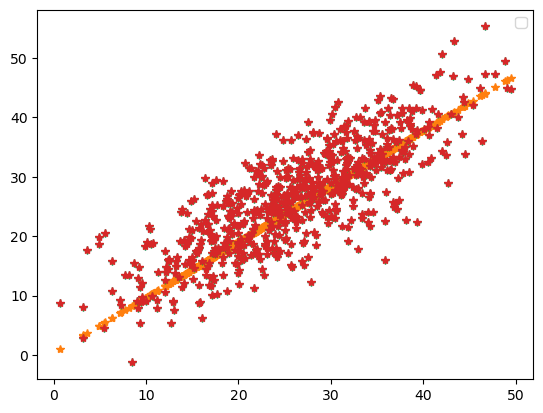

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=17, Loss=1.5033938635758552


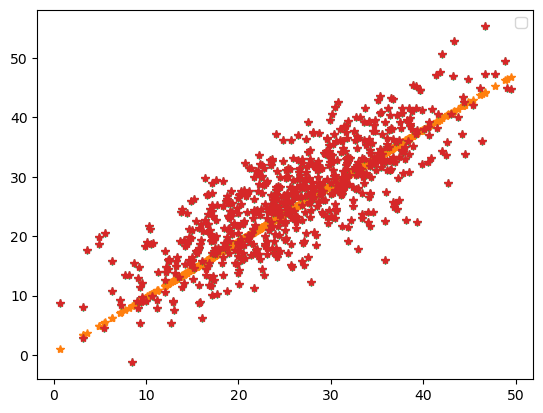

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=18, Loss=1.352835336786169


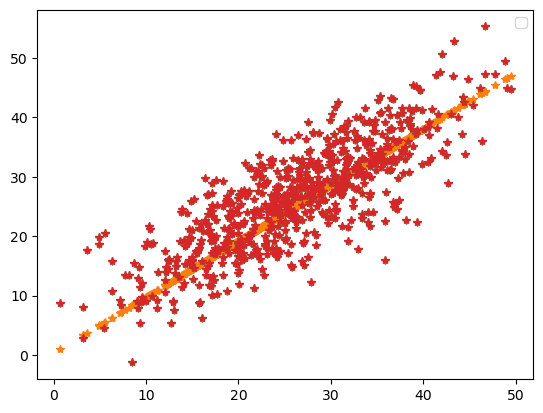

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=19, Loss=1.2207978708996103


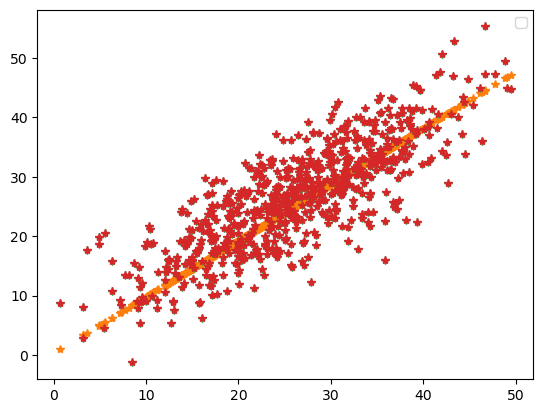

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=20, Loss=1.1048397907191747


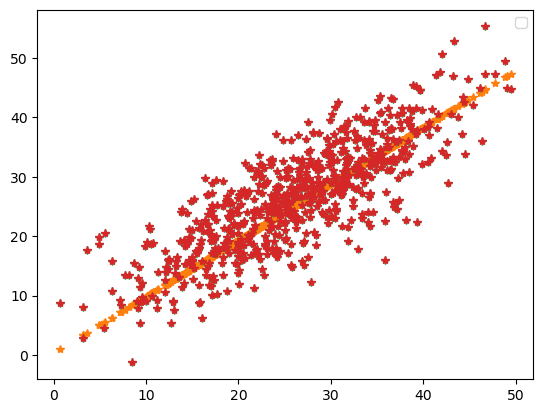

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=21, Loss=1.0028561644610663


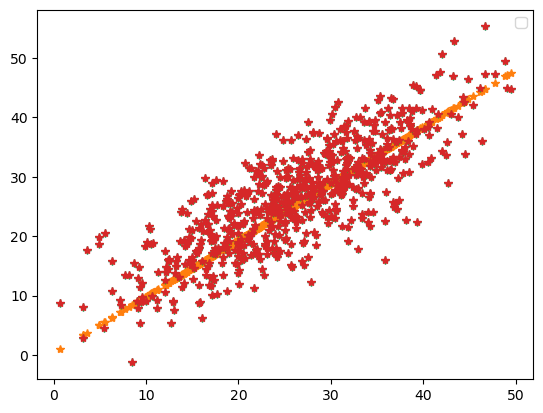

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=22, Loss=0.9130311202361687


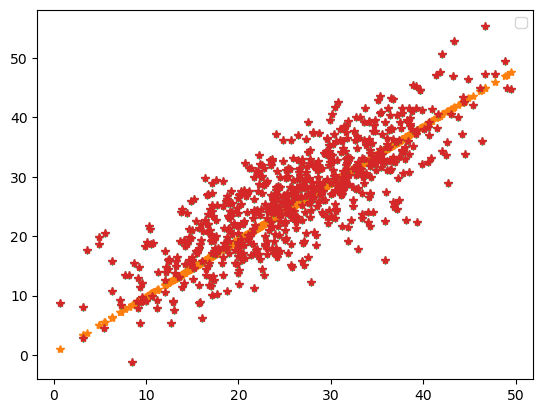

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=23, Loss=0.8337970138323989


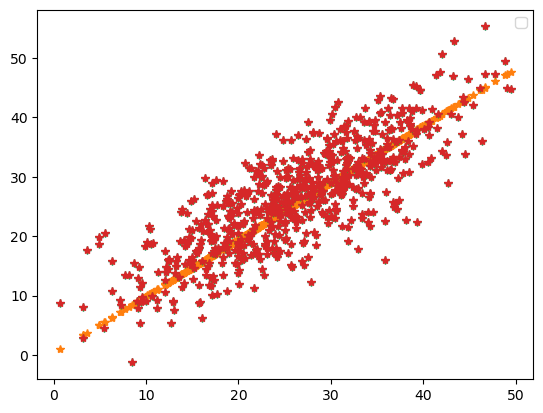

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=24, Loss=0.7637994556611958


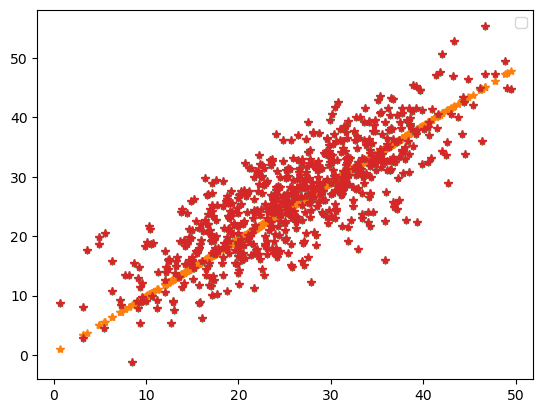

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=25, Loss=0.701867348995041


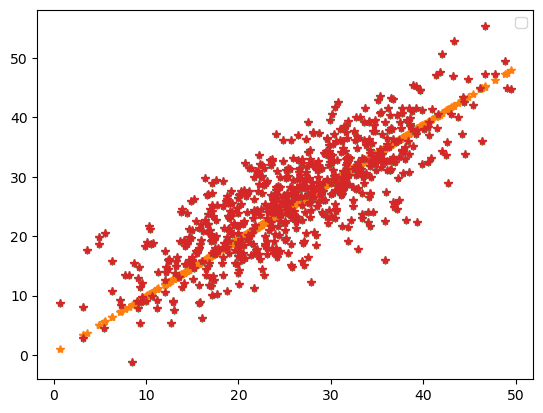

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=26, Loss=0.6469872148645816


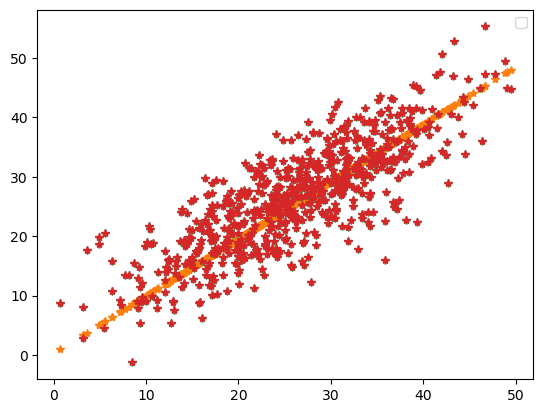

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=27, Loss=0.5982811842701985


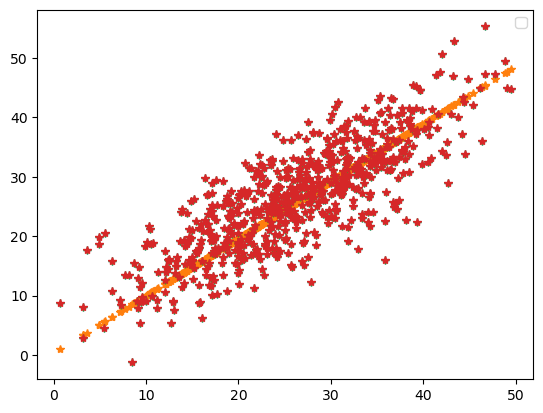

Itretion=28, Loss=0.5549881283130573


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


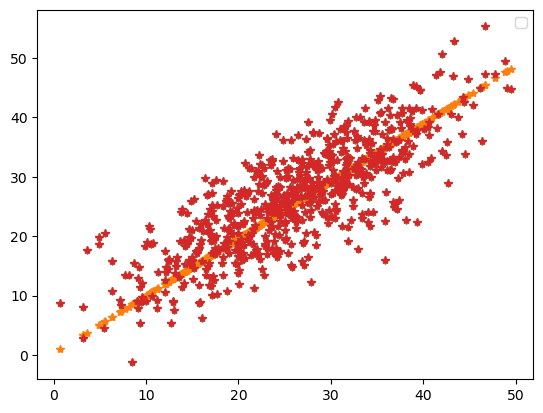

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=29, Loss=0.5164474737013757


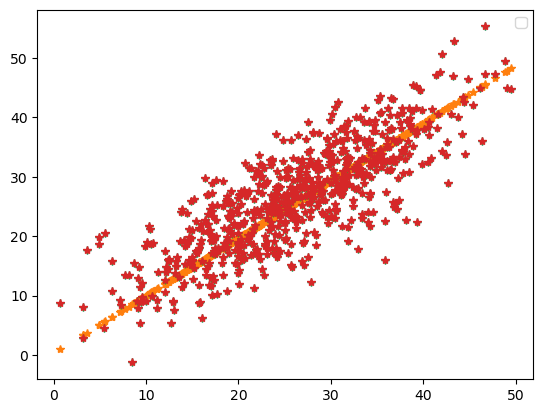

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Itretion=30, Loss=0.48208531674944227


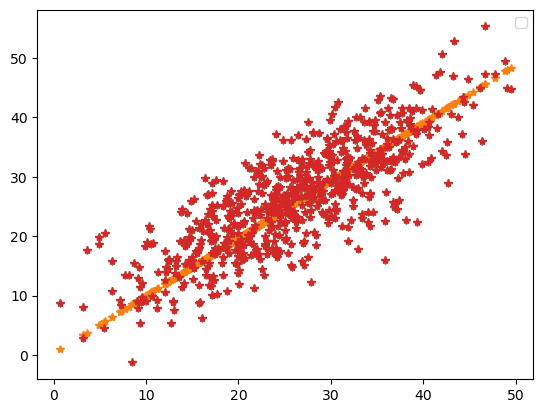

In [104]:
#training
parameters,loss=Train(train_input,train_output,learning_rate=0.0001,iters=30)

In [105]:
parameters

{'m': 0.9725155411972409, 'c': 0.26125898846056517}

In [106]:
loss

[11.122435624735271,
 9.682679492642286,
 8.440980754278655,
 7.369336243998786,
 6.443763088077797,
 5.643716778102159,
 4.951593841407935,
 4.352306782580192,
 3.8329207680568054,
 3.3823430614666337,
 2.9910575287936725,
 2.6508976525189447,
 2.354852450494574,
 2.096900512313908,
 1.8718680637366114,
 1.6753075657115657,
 1.5033938635758552,
 1.352835336786169,
 1.2207978708996103,
 1.1048397907191747,
 1.0028561644610663,
 0.9130311202361687,
 0.8337970138323989,
 0.7637994556611958,
 0.701867348995041,
 0.6469872148645816,
 0.5982811842701985,
 0.5549881283130573,
 0.5164474737013757,
 0.48208531674944227]

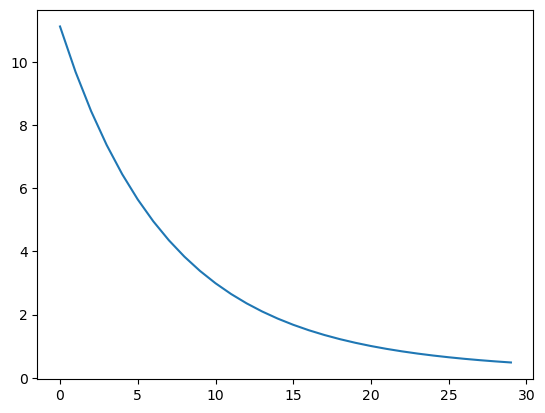

In [107]:
plt.plot(loss)

In [108]:
#prediction 
test_predictions=test_input*parameters["m"]+parameters["c"]

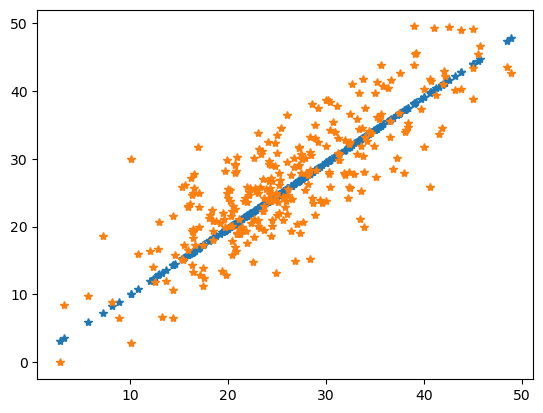

In [115]:
plt.plot(test_input,test_predictions,"*")
plt.plot(test_input,test_output,"*")
plt.show()

In [116]:
#cost of prediction
cost_fun(test_output,test_predictions)

0.7093790764565866